# Import Data Set

In [ ]:
import pandas as pd
data = pd.read_csv("/content/NewspaperData.csv")
data.head()

In [ ]:
data

In [ ]:
data.info()

# Correlation

In [4]:
data.corr() # check daily vs sunday

<ipython-input-4-8118f3cf625e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr() # check daily vs sunday


,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


In [ ]:
import seaborn as sns
sns.distplot(data['daily']) # density plot for daily - positive skewness in data

In [ ]:
sns.distplot(data['sunday']) # density plot for sunday - positive skewness in data

Fitting a Linear Regression Model

In [ ]:
import statsmodels.formula.api as smf # model - Regression model, "Y~X", OR "Dependent_variable~Independent_Variable"
model = smf.ols("sunday~daily",data = data).fit() # Ordinary Least Squares, y Dep. variable - sunday, then give ~ symbol and then x Ind.Variable - daily,
                                                  # dataset - data, fit() - fit the regression line

In [ ]:
#Coefficients are B0 and B1
model.params
# Reg. Equn: Sunday = B0+B1*daily
# In output: Intercept - B0, daily - coefficient of daily i.e.B1
# Sunday = 13.83 + 1.33 * daily
# we assumed daily circulation as 200
# So Sunday = 13.83 + 1.33 * 200

Intercept    13.835630
daily         1.339715
dtype: float64

In [ ]:
sun=13.83+1.33*200
sun

279.83

In [ ]:
#R squared values - 0.92 - Good reg. equn.
(model.rsquared,model.rsquared_adj)

(0.9180596895873295, 0.9154990548869336)

In [ ]:
# model.summary() # OLS - Ordinary Least Squares

<Axes: xlabel='daily', ylabel='sunday'>

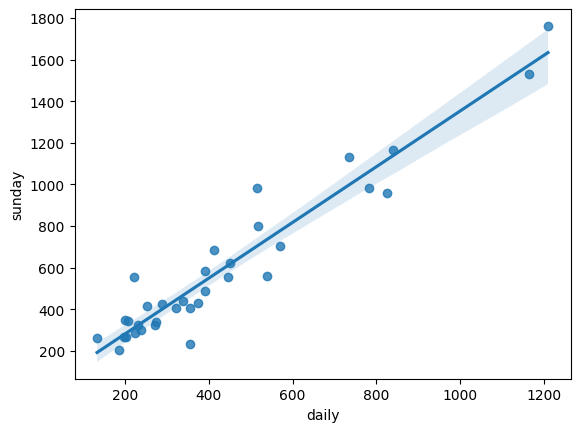

In [ ]:
sns.regplot(x="daily", y="sunday", data=data)

In [ ]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)
# we have estimates: B0=13.8, B1=1.33. We have t-value 0.38 and 18.93, p-value - 0.7, 6.01 is approx.= 0
#focus on B1. B1 is slope. Define H0 and H1. H0: B1=0 i.e. No effect of x on y, Ha: B1!=0 i.e. There exists significant effect of x on y.
# Here P < Alfa so reject H0 and accept Ha which means Daily variable has significant effect on Sunday variable.

Intercept     0.386427
daily        18.934840
dtype: float64 
 Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


In [ ]:
#1100 manual calculation
(1.3*1100)+13.835630

1443.83563

In [ ]:
# predict value for 150,240

# Predict for new data point

In [ ]:
#Predict for 200 and 300 daily circulation
newdata=pd.Series([200,300]) # x value is (daily circulation) 200 at one branch and 300 at another branch

In [ ]:
newdata

In [ ]:
data_pred=pd.DataFrame(newdata,columns=['daily'])

In [ ]:
data_pred

In [ ]:
model.predict(data_pred) # model - regression model

0    281.778581
1    415.750057
dtype: float64